In [19]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

## Wages

### Merge File

In [5]:
countryMapping = {
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BRA': 'Brazil',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CHN': 'China', 'COL': 'Colombia',
    'CRI': 'Costa Rica', 'CZE': 'Czech Republic', 'DEU': 'Germay', 'DNK': 'Denmark', 'ESP': 'Spain',
    'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece',
    'HUN': 'Hungary', 'IDN': 'Indonesia', 'IND': 'India', 'IRL': 'Ireland', 'ISL': 'Iceland',
    'ISR': 'Isreal', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia', 'SVK': 'Slovak Republic',
    'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'Turkey', 'USA': 'United States of America', 'ZAF': 'South Africa'
}

In [85]:
wage_file = '../avg_wages.csv'
suicide_file = '../Adjusted Suicide Rate.csv'
df_wage = pd.read_csv(wage_file)
df_suicide = pd.read_csv(suicide_file)

new_pd = pd.DataFrame(columns=['country', 'year', 'wage', 'cor'])

# create new_pd to store mappedCountry from df_wage
for index,row in df_wage.iterrows():
    new_pd = new_pd.append({'country': countryMapping[row['LOCATION']], 'year': row['TIME'], 'wage': row['Value']}, ignore_index=True)


In [86]:
new_pd.head()

,country,year,wage,cor
0,Australia,1990,36682.942425,NaN
1,Australia,1991,36776.247678,NaN
2,Australia,1992,37692.129358,NaN
3,Australia,1993,38112.690279,NaN
4,Australia,1994,38488.116634,NaN


In [87]:
df_suicide.head()

,country,year,suicide_rate
0,Albania,1979,NaN
1,Albania,1980,NaN
2,Albania,1981,NaN
3,Albania,1982,NaN
4,Albania,1983,NaN


In [88]:
# convert type
print(df_suicide['country'].dtype,df_suicide['year'].dtype, new_pd['country'].dtype, new_pd['year'].dtype)

# Before merge, joined column should be converted to same data type
new_pd['year'] = new_pd['year'].apply(int)

# or do following
# new_pd['year'] = new_pd['year'].astype(df_suicide['year'].dtype)

print(new_pd['year'].dtype, df_suicide['year'].dtype)

object int64 object object
int64 int64


In [91]:
# merge
df_merge = pd.merge(df_suicide, new_pd, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

df_merge.head()

,country,year,suicide_rate,wage,cor
0,Australia,1990,12.2,36682.942425,NaN
1,Australia,1991,12.5,36776.247678,NaN
2,Australia,1992,12.1,37692.129358,NaN
3,Australia,1993,10.8,38112.690279,NaN
4,Australia,1994,12.0,38488.116634,NaN


In [90]:
# remove NaN
suicide_rates = df_merge[(df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
wages = df_merge[(df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].wage.values

print(suicide_rates[:3])
print(wages[:3])

# reshape doesn't change original data
wages.reshape(-1,1)[:3]

[12.2 12.5 12.1 10.8 12.  11.3 12.4 13.5 13.3 12.4 11.7 11.8 11.  10.1
  9.7  9.4  9.7 10.   9.6  9.8  9.7 10.3 10.2 11.2 11.6]
[36682.94242455 36776.24767829 37692.12935818]


array([[36682.94242455],
       [36776.24767829],
       [37692.12935818]])

### Correlation

In [92]:
# Correlation
cor, p = pearsonr(wages, suicide_rates)
print(cor, p)
print(df_merge.country.unique())

-0.6217429710541293 0.0009072346899258495
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Japan' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'United Kingdom'
 'United States of America']


In [95]:
pd_suicide_rate_wage_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge.country.unique():
    suicide_rates = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
    wages = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].wage.values
    cor, p = pearsonr(wages, suicide_rates)
#     print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_wage_cor = pd_suicide_rate_wage_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)
    
    

In [100]:
pd_suicide_rate_wage_cor.head()

,country,cor,p
0,Australia,-0.621743,9.072347e-04
1,Austria,-0.979314,7.234952e-19
2,Belgium,-0.444588,2.286961e-02
3,Canada,-0.899056,2.380221e-09
4,Chile,0.542317,1.349794e-02


In [101]:
pd_suicide_rate_wage_cor.to_csv("suicide_rate_wages_cor.csv")

### Regression

In [59]:
# Regression
reg = linear_model.LinearRegression()

# make wages to 1 dimension (wages.reshape(-1)), and then shape to 1 column shape
reg.fit(wages.reshape(-1,1), suicide_rates)

# slope and intercept
print(reg.coef_, reg.intercept_)

[-0.00017065] 18.559641087977056


In [60]:
reg.predict([[1990]])

array([18.22004057])

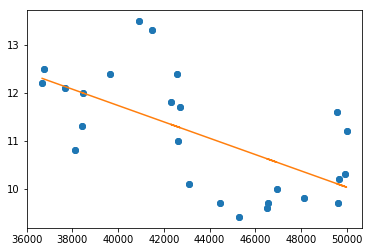

In [62]:
line = reg.coef_*wages.reshape(-1, 1)+reg.intercept_

plt.scatter(wages, suicide_rates)
plt.plot(wages.reshape(-1,1), suicide_rates,'o', wages.reshape(-1,1), line)
plt.show()


In [63]:
reg.score(wages.reshape(-1,1), suicide_rates)

0.38656432205521607

## Population density

### merge file

In [115]:
pop_file = '../population_density.csv'
suicide_file = '../Adjusted Suicide Rate.csv'
df_pop = pd.read_csv(pop_file)
df_suicide = pd.read_csv(suicide_file)

countries = [
    'AUS', 'AUT', 'BEL', 'BRA',
    'CAN', 'CHE', 'CHL', 'CHN', 'COL',
    'CRI', 'CZE', 'DEU', 'DNK', 'ESP',
    'EST', 'FIN', 'FRA', 'GBR', 'GRC',
    'HUN', 'IDN', 'IND', 'IRL', 'ISL',
    'ISR', 'ITA', 'JPN', 'KOR', 'LTU',
    'LUX', 'LVA', 'MEX', 'NLD', 'NOR',
    'NZL', 'POL', 'PRT', 'RUS', 'SVK',
    'SVN', 'SWE', 'TUR', 'USA', 'ZAF'
]

# filter out unnecessary country district
df_pop_filtered = df_pop[df_pop['METRO_ID'].isin(countries)]

# create new_pd to store mappedCountry from df_wage
for index,row in df_pop_filtered.iterrows():
    new_pd = new_pd.append({'country': countryMapping[row['METRO_ID']], 'year': row['TIME'], 'type': row['VAR'], 'value': row['Value']}, ignore_index=True)


In [119]:
new_pd.head()

,country,year,type,value,cor
0,Austria,2000,POP,8002186.0,NaN
1,Austria,2001,POP,8020946.0,NaN
2,Austria,2002,POP,8063640.0,NaN
3,Austria,2003,POP,8100273.0,NaN
4,Austria,2004,POP,8142573.0,NaN


In [120]:
df_suicide.head()

,country,year,suicide_rate
0,Albania,1979,NaN
1,Albania,1980,NaN
2,Albania,1981,NaN
3,Albania,1982,NaN
4,Albania,1983,NaN


In [124]:
# convert type
print(df_suicide['country'].dtype,df_suicide['year'].dtype, new_pd['country'].dtype, new_pd['year'].dtype)

# Before merge, joined column should be converted to same data type
# new_pd['year'] = new_pd['year'].apply(int)

# or do following
new_pd['year'] = new_pd['year'].astype(df_suicide['year'].dtype)

print(new_pd['year'].dtype, df_suicide['year'].dtype)

object int64 object int64
int64 int64


In [125]:
# merge
df_merge = pd.merge(df_suicide, new_pd, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

df_merge.head()

,country,year,suicide_rate,type,value,cor
0,Australia,2000,11.7,POP,19028802.00,NaN
1,Australia,2000,11.7,POP_DENS,2.47,NaN
2,Australia,2001,11.8,POP,19274701.00,NaN
3,Australia,2001,11.8,POP_DENS,2.50,NaN
4,Australia,2002,11.0,POP,19495210.00,NaN


In [139]:
# devide pop and pop_dens and remove NaN
suicide_rates_pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].value.values

suicide_rates_pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].value.values

print(suicide_rates_pop_dens.shape)
print(pop.shape)
print(pop_dens.shape)

(14,)
(14,)
(14,)


### Correlation

In [140]:
# Correlation
cor, p = pearsonr(pop, suicide_rates_pop)
print(cor, p)
print(df_merge.country.unique())

-0.305895510850681 0.2875052196752849
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Greece' 'Hungary' 'Ireland'
 'Italy' 'Japan' 'Mexico' 'Netherlands' 'Norway' 'Poland' 'Portugal'
 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom'
 'United States of America']


In [145]:
pd_suicide_rate_pop_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge.country.unique():
    suicide_rates_pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
    pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].value.values
    cor, p = pearsonr(pop, suicide_rates_pop)
#     print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_pop_cor = pd_suicide_rate_pop_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)
    
    

In [146]:
pd_suicide_rate_pop_dens_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge.country.unique():
    suicide_rates_pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
    pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].value.values
    cor, p = pearsonr(pop_dens, suicide_rates_pop_dens)
#     print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_pop_dens_cor = pd_suicide_rate_pop_dens_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)
    
    

In [147]:
pd_suicide_rate_pop_dens_cor.head()

,country,cor,p
0,Australia,-0.306135,2.871093e-01
1,Austria,-0.949784,6.255623e-08
2,Belgium,-0.854798,4.913009e-05
3,Canada,-0.739670,2.495791e-03
4,Chile,-0.021315,9.398975e-01


In [144]:
pd_suicide_rate_pop_dens_cor.to_csv("suicide_rate_pop_dens_cor.csv")